170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


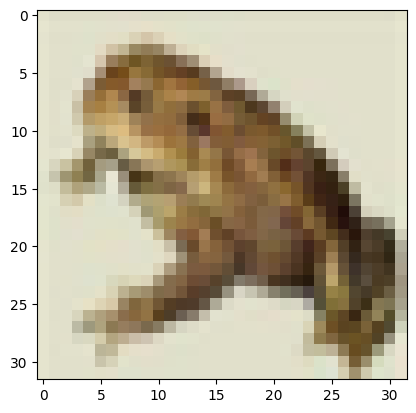

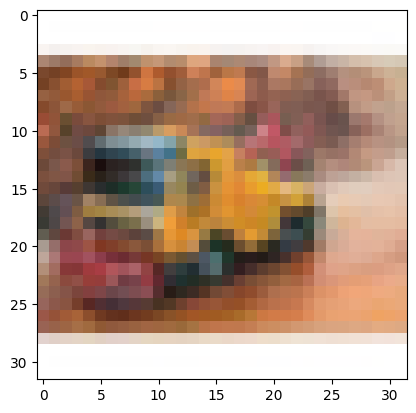

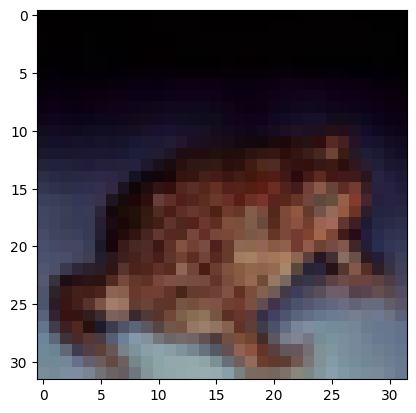

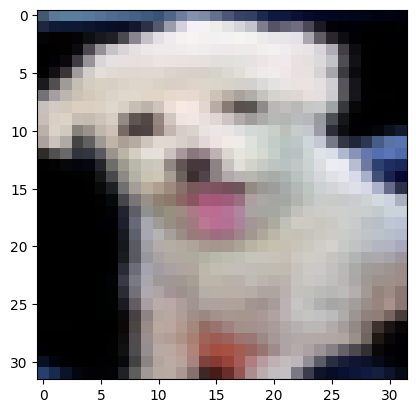

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 28s 19ms/step - accuracy: 0.3075 - loss: 2.1474 - val_accuracy: 0.5067 - val_loss: 1.3964
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - accuracy: 0.5409 - loss: 1.2777 - val_accuracy: 0.6447 - val_loss: 1.0068
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6293 - loss: 1.0444 - val_accuracy: 0.6952 - val_loss: 0.8628
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.6854 - loss: 0.9043 - val_accuracy: 0.7353 - val_loss: 0.7619
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.7093 - loss: 0.8274 - val_accuracy: 0.6967 - val_loss: 0.8943
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7339 - loss: 0.7708 - val_accuracy: 0.7538 - val_loss: 0.7266
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.7516 - loss: 0.7123 - val_accuracy: 0.7869 - val_loss: 0.6300
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7653 - loss: 0.6793 - val_accuracy

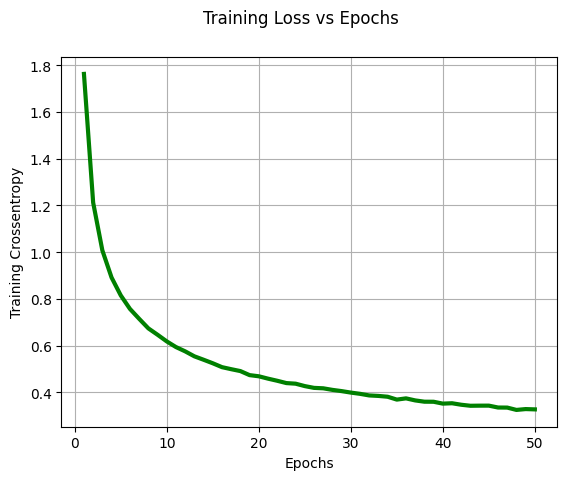

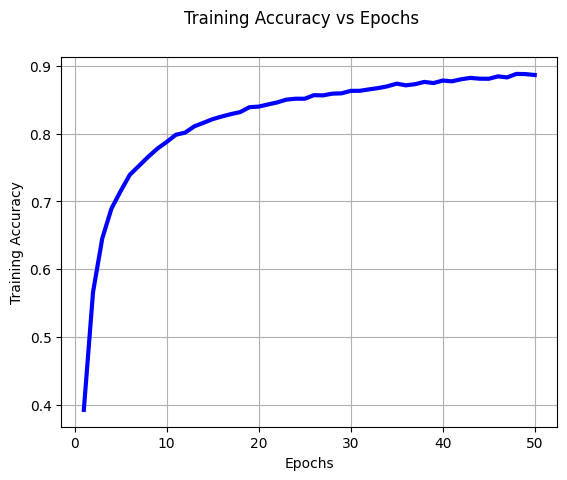

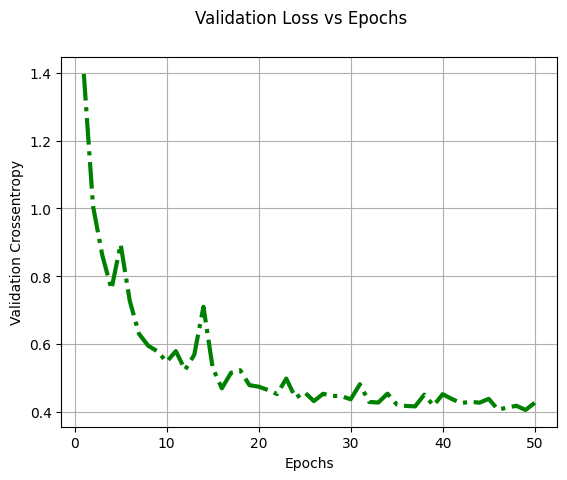

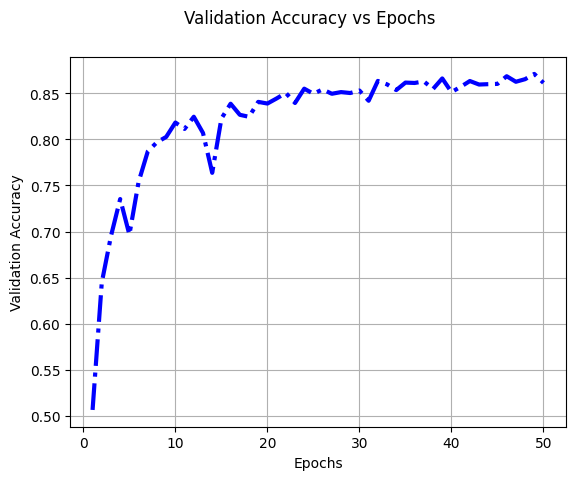

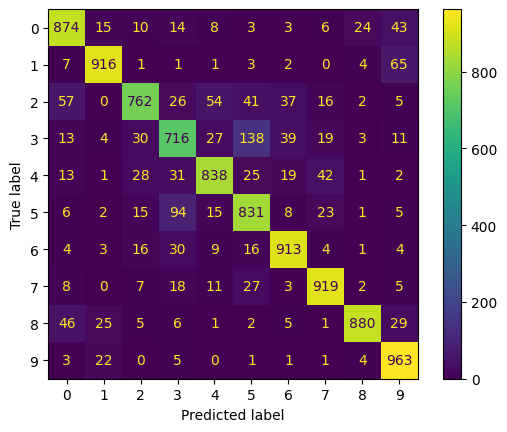

In [1]:
import tensorflow as tf
from keras.datasets import cifar10
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay




#CIFAR is an acronym that stands for the Canadian
#Institute For Advanced Research and the CIFAR-10
#dataset was developed along with the CIFAR-100
#dataset by researchers at the CIFAR institute.


#The dataset is comprised of 60,000 32×32
#pixel color photographs of objects from 10 classes,
#such as frogs, birds, cats, ships, etc.
#The class labels and their standard associated
#integer values are listed below.


#0: airplane
#1: automobile
#2: bird
#3: cat
#4: deer
#5: dog
#6: frog
#7: horse
#8: ship
#9: truck


(Xtrain, ytrain), (Xtest, ytest) = cifar10.load_data()


#Show sample images
plt.figure(1)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()


plt.figure(2)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()


plt.figure(3)
imgplot1 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()


plt.figure(4)
imgplot2 = plt.imshow(Xtrain[nr.randint(50000)])
plt.show()


Xtrain = Xtrain.astype('float32')
Xtrain = Xtrain/ 255.0
Xtest = Xtest.astype('float32')
Xtest = Xtest / 255.0


ytrain = ytrain[:,0]
ytrainEnc = tf.one_hot(ytrain, depth=10)
ytest = ytest[:,0]
ytestEnc = tf.one_hot(ytest, depth=10)


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))


model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(Xtrain, ytrainEnc, epochs=50, batch_size=64, validation_data=(Xtest, ytestEnc))

ypred = model.predict(Xtest)
ypred = np.argmax(ypred, axis=1)

score = accuracy_score(ypred,ytest)
print('Accuracy score is',100*score,'%')


cmat = confusion_matrix(ytest, ypred)
print('Confusion matrix of Neural Network is \n',cmat,'\n')


plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'],'g-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Training Loss vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['accuracy'],'b-',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.grid(1,which='both')
plt.suptitle('Training Accuracy vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_loss'],'g-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Crossentropy')
plt.grid(1,which='both')
plt.suptitle('Validation Loss vs Epochs')
plt.show()


plt.plot(range(1, len(history.history['loss']) + 1), history.history['val_accuracy'],'b-.',linewidth=3)
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.grid(1,which='both')
plt.suptitle('Validation Accuracy vs Epochs')
plt.show()


disp = ConfusionMatrixDisplay(confusion_matrix=cmat)
disp.plot()
